In [1]:
%matplotlib inline

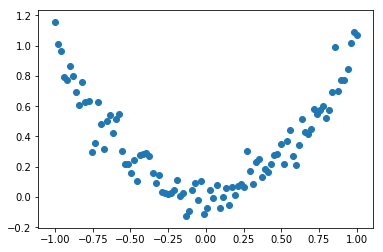

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

tf.set_random_seed(342)
np.random.seed(685)

# preparing dataset
x = np.linspace(-1, 1, 100)[:, np.newaxis]          # shape (100, 1)
noise = np.random.normal(0, 0.1, size=x.shape)
# y =x^2
y = np.power(x, 2) + noise                          # shape (100, 1) + white noise

# plot data
plt.scatter(x, y)
plt.show()


In [ ]:
# constructing NN
# https://www.tensorflow.org/api_docs/python/tf/placeholder
tf_x = tf.placeholder(tf.float32, x.shape)     # input x
tf_y = tf.placeholder(tf.float32, y.shape)     # input y

# neural network layers
# https://www.tensorflow.org/api_docs/python/tf/layers/dense
l1 = tf.layers.dense(tf_x, 10, tf.nn.relu)          # hidden layer
output = tf.layers.dense(l1, 1)                     # output layer

![nn](https://imgur.com/a/Cbmj1fn)

In [ ]:
# https://www.tensorflow.org/api_docs/python/tf/losses/mean_squared_error
loss = tf.losses.mean_squared_error(tf_y, output)   # compute cost

# https://www.tensorflow.org/api_docs/python/tf/train/GradientDescentOptimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train_op = optimizer.minimize(loss)

# https://www.tensorflow.org/api_docs/python/tf/Session
sess = tf.Session()                                 # control training and others
sess.run(tf.global_variables_initializer())         # initialize var in graph

In [ ]:
plt.ion()   # something about plotting

for step in range(100):
    # train and net output
    _, l, pred = sess.run([train_op, loss, output], {tf_x: x, tf_y: y})
    if step % 5 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x, y)
        plt.plot(x, pred, 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % l, fontdict={'size': 20, 'color': 'red'})
        plt.pause(0.1)

plt.ioff()
plt.show()